In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score
import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the CSV file into a DataFrame
data = pd.read_csv('UCI_Dataset.csv')

# Display the first few rows of the DataFrame
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
# Descriptive statistics
print("\nDescriptive Statistics:")
desc_stats = data.describe()
print(desc_stats)



Descriptive Statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000   

In [ ]:
# Check for missing values
print("\nMissing Values:")
missing_values = data.isnull().sum()
print(missing_values)



Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Text(0.5, 1.0, 'Age Distribution')

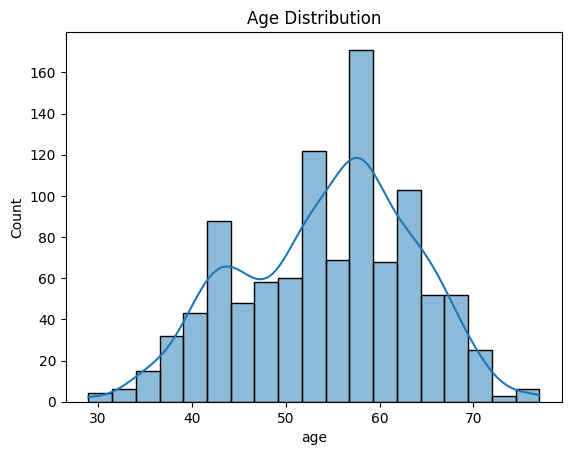

In [ ]:
#histogram to see the distribution of age
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')

In [ ]:
stat , Pvalue = stats.shapiro(data['age'])
if Pvalue > 0.05:
    print("Normally distributed")
else:
    print("Not a normal distribution")

Not a normal distribution


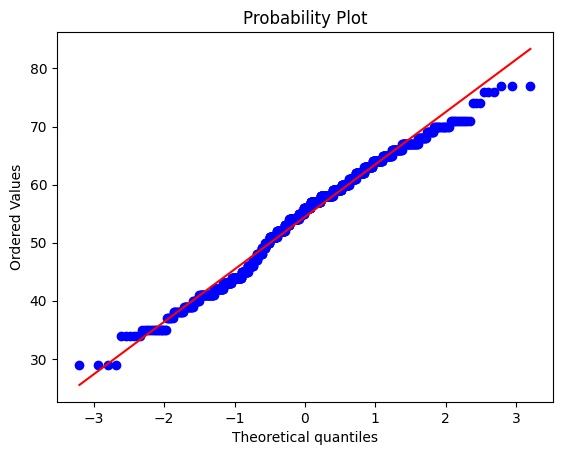

In [ ]:
# QQ plot for checking normality
stats.probplot(data['age'],dist="norm", plot=plt)
plt.show()

In [ ]:
# Chi Square testing to see effect of gender on target
contigency_data = pd.crosstab(data['sex'],data['target'])

stat,pvalue,dof,exp =stats.chi2_contingency(contigency_data)

print('stat=%.3f, p=%.3f' % (stat, pvalue))
if pvalue > 0.05:
    print('Same distribution no effect of sex on heart disease')
else:
    print('There is a effect of sex on heart disease')

stat=78.863, p=0.000
There is a effect of sex on heart disease


<Axes: xlabel='age', ylabel='trestbps'>

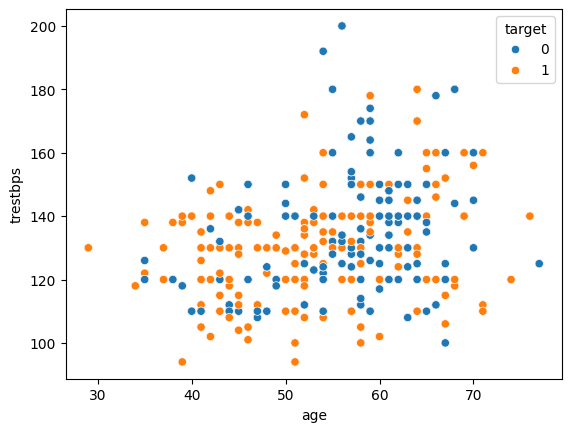

In [ ]:
sns.scatterplot(data,y='trestbps',x='age',hue='target')

In [ ]:
fig = px.box(data,y="age",x="target",title=f"Distrubution of Age")
fig.show()

In [ ]:
fig = px.box(data,y="chol",x="target",title=f"Distrubution of Cholesterol")
fig.show()

In [ ]:
fig = px.box(data,y="oldpeak",x="target",title=f"Distrubution of Oldpeak")
fig.show()

In [ ]:
fig = px.box(data,y="thal",x="target",title=f"Distrubution of MaxHR")
fig.show()

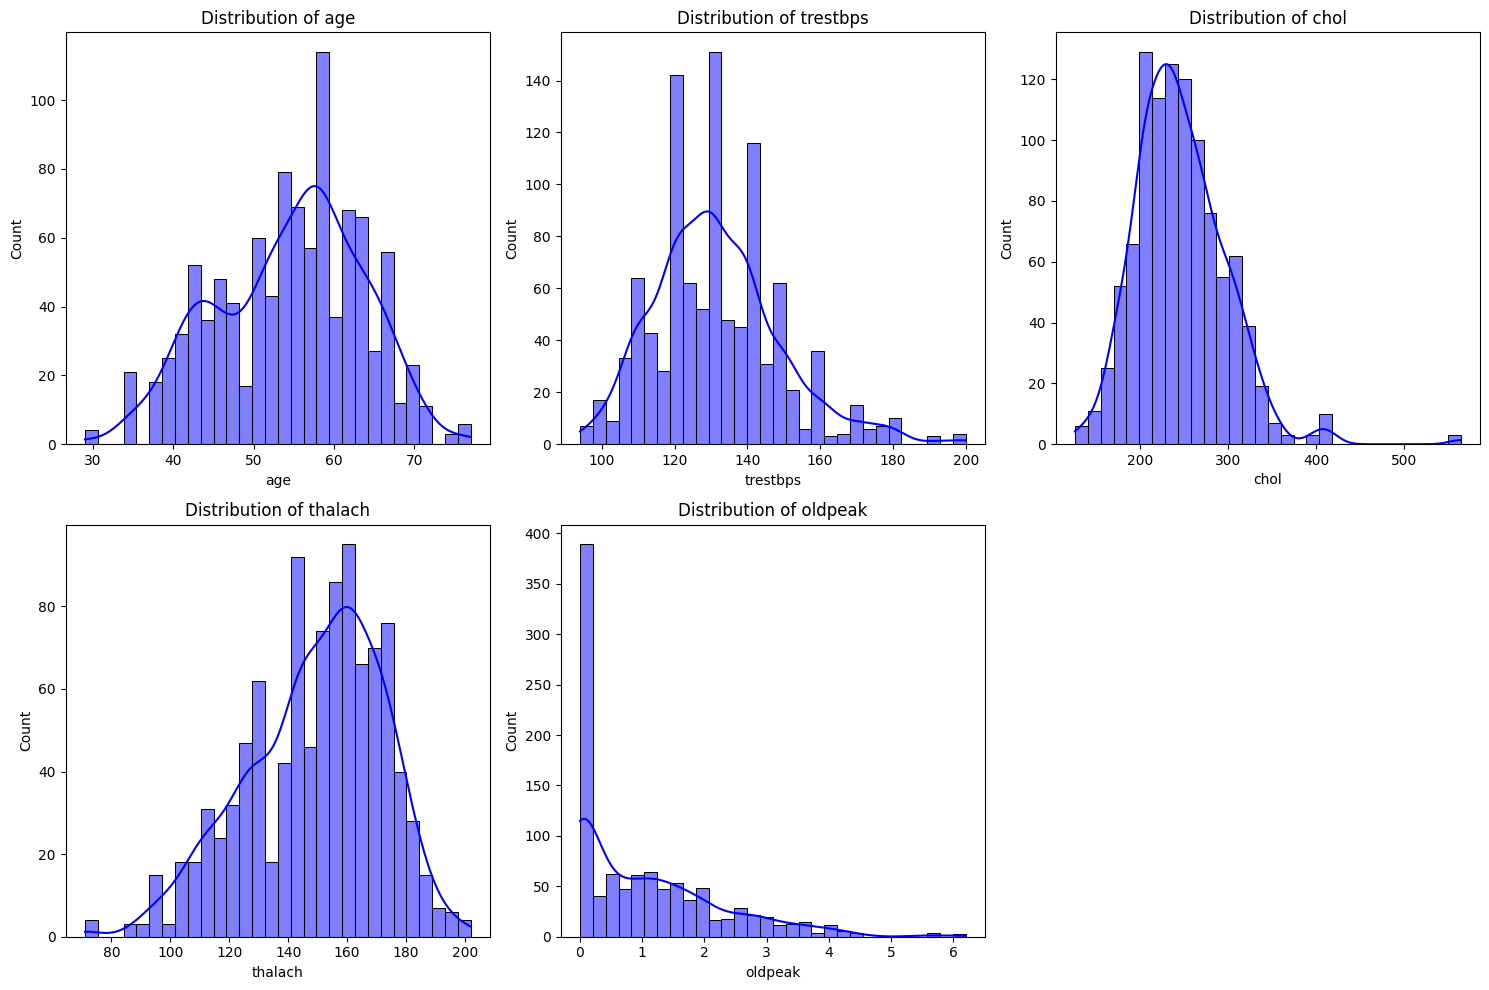

In [ ]:
# Distribution of Numerical Features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


In [ ]:
fig = px.histogram(data, x='age', color='sex')
fig.show()

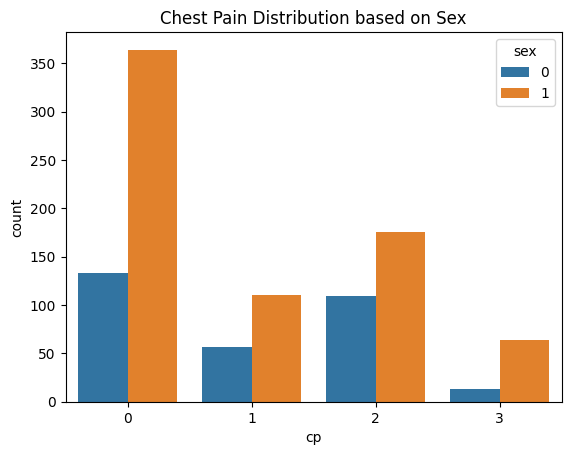

In [ ]:
sns.countplot(data, x='cp', hue='sex')
plt.title('Chest Pain Distribution based on Sex')
plt.show()

In [ ]:
fig = px.histogram(data, x='age', color='cp')
fig.show()

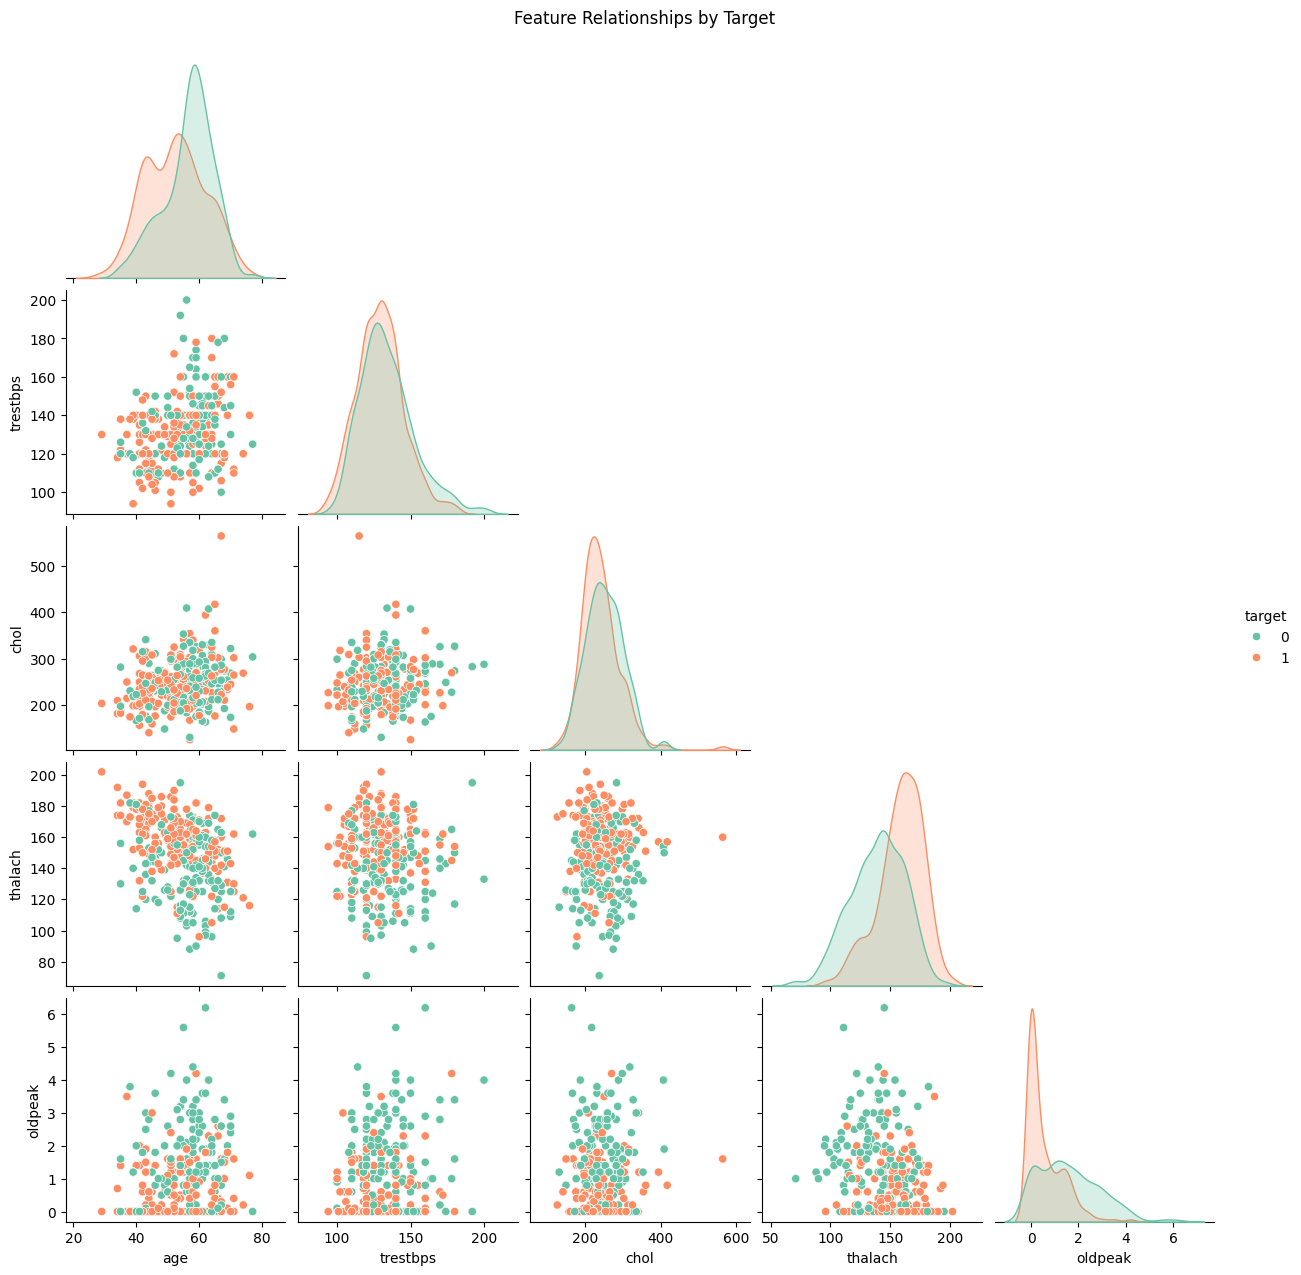

In [ ]:
# Ensure all columns are in appropriate numerical format
data = data.apply(pd.to_numeric, errors='coerce')


sns.pairplot(data, vars=numerical_features, hue='target', diag_kind='kde', palette='Set2', corner=True)
plt.suptitle("Feature Relationships by Target", y=1.02)
plt.show()


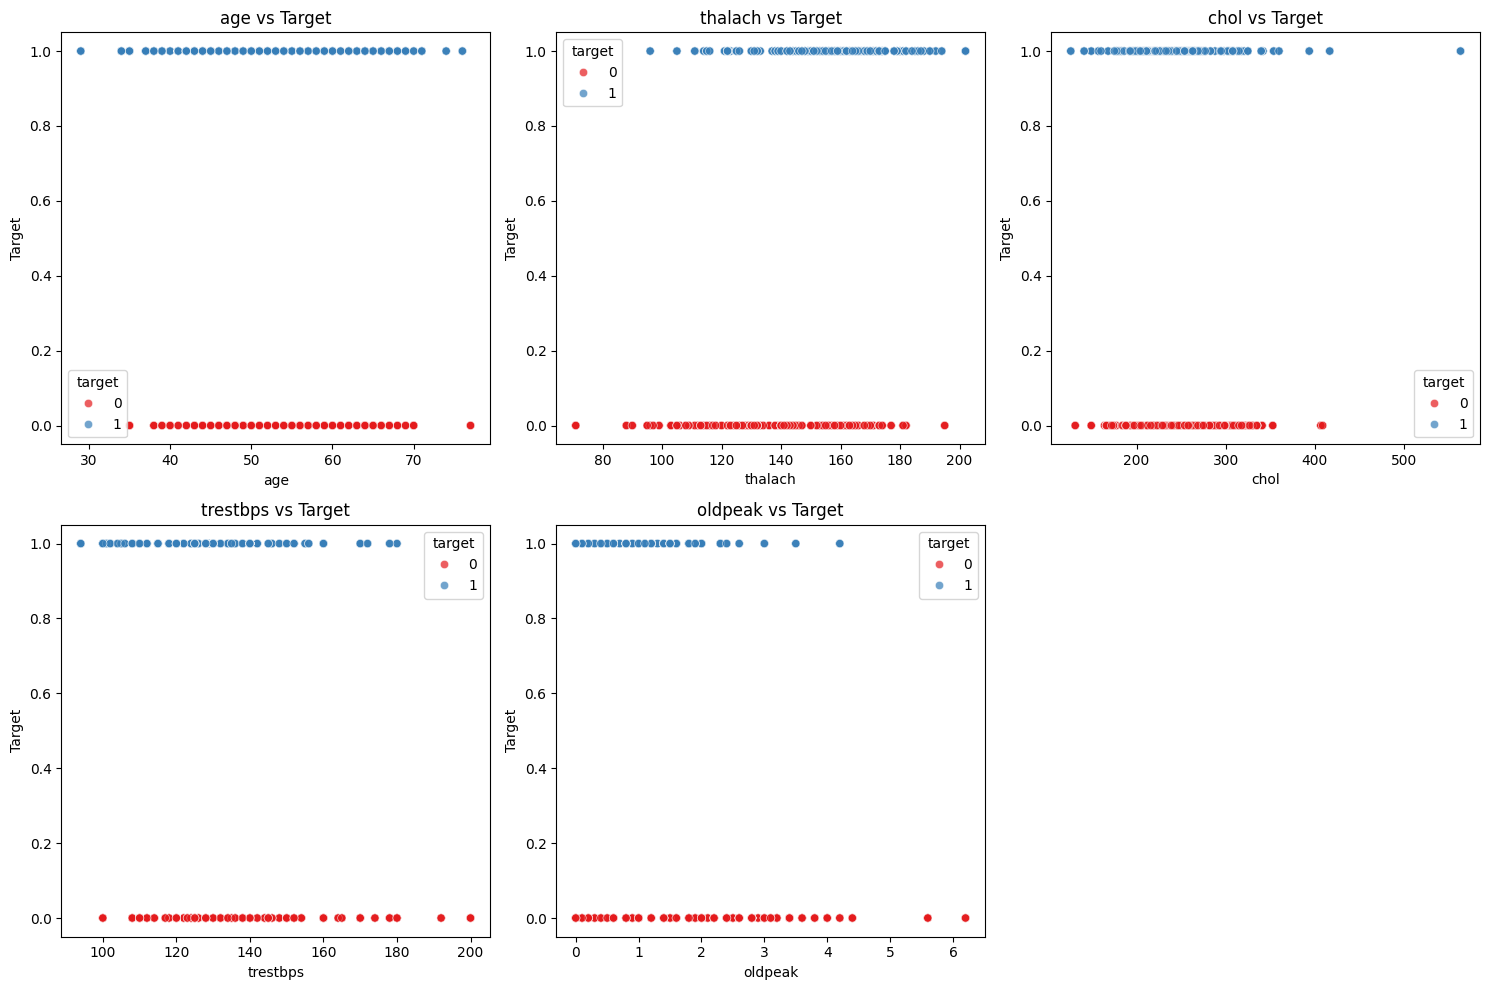

In [ ]:
# Scatter plots for key feature interactions with the target variable
selected_features = ['age', 'thalach', 'chol', 'trestbps', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data[feature], y=data['target'], hue=data['target'], palette='Set1', alpha=0.7)
    plt.title(f"{feature} vs Target")
    plt.xlabel(feature)
    plt.ylabel("Target")
plt.tight_layout()
plt.show()

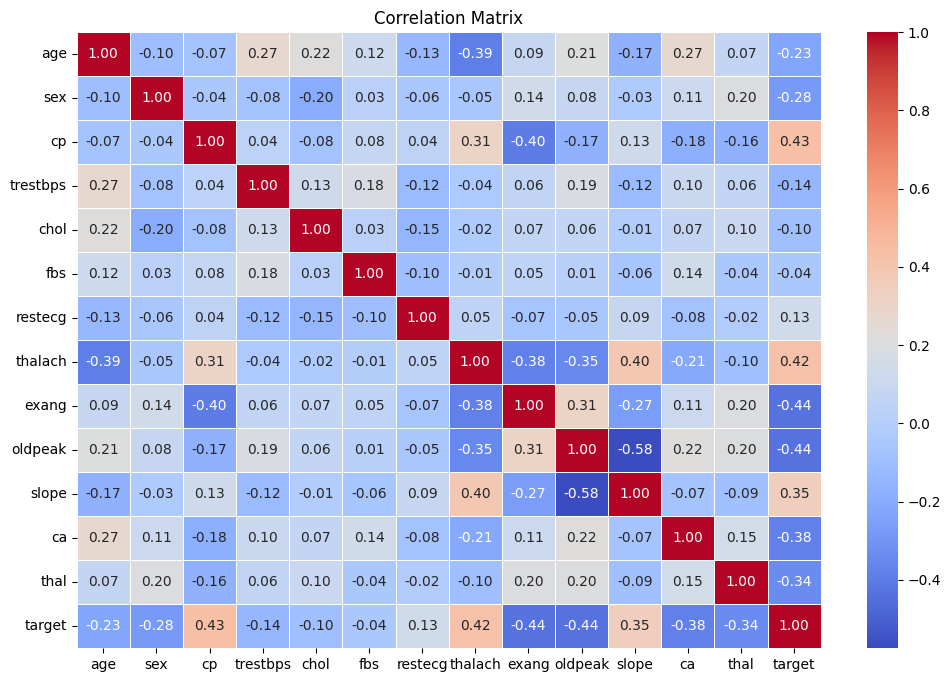

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


<ipython-input-21-c6b7e83ab585>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




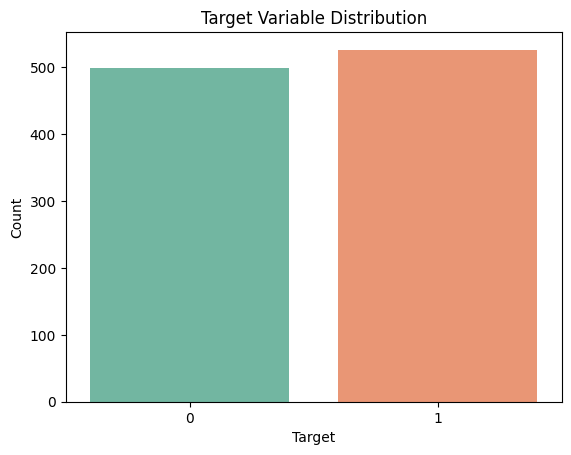

In [ ]:
# Target Variable Distribution
sns.countplot(x='target', data=data, palette='Set2')
plt.title("Target Variable Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


In [ ]:
# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train a Random Forest model specifically for feature importance extraction
rf_model_for_importance = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42
)
rf_model_for_importance.fit(X, y)

# Extract feature importance
feature_importances = rf_model_for_importance.feature_importances_
feature_importance_percent = 100 * (feature_importances / feature_importances.sum())
feature_importance_df = pd.DataFrame({
    'Feature': data.drop('target', axis=1).columns,
    'Importance (%)': feature_importance_percent
}).sort_values(by='Importance (%)', ascending=False)

# Display feature importance
# Display feature importance using a simple print-friendly format
feature_importance_df.reset_index(drop=True, inplace=True)
print("Feature Importance in Percentage:")
print(feature_importance_df)


Feature Importance in Percentage:
     Feature  Importance (%)
0         cp       13.482060
1         ca       12.008439
2    thalach       11.365769
3    oldpeak       11.175137
4       thal       10.751361
5        age        8.787922
6       chol        7.804340
7   trestbps        7.064993
8      exang        6.329754
9      slope        4.623138
10       sex        3.590248
11   restecg        2.108138
12       fbs        0.908700


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



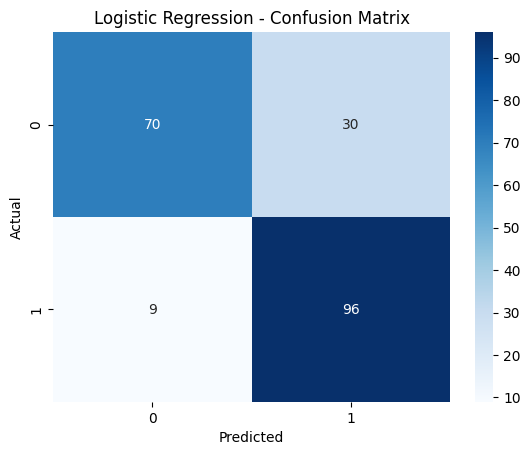

In [ ]:



# Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluation
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



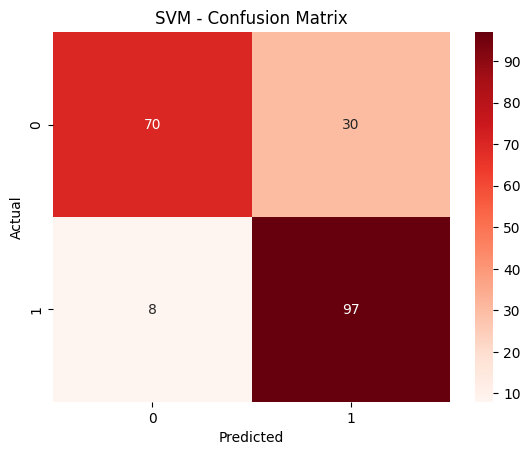

In [ ]:


# SVM Model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation
print("SVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Reds')
plt.title("SVM - Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


k-NN - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       100
           1       0.87      0.86      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



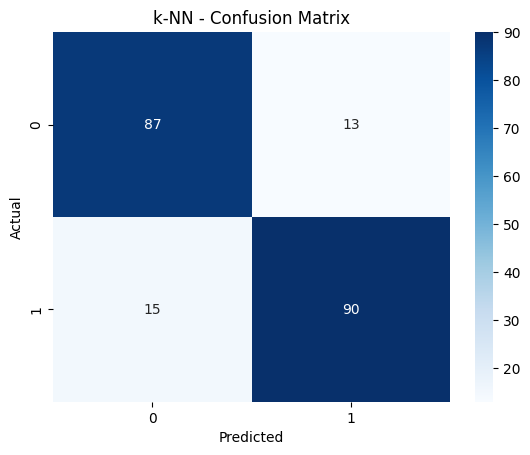

In [ ]:


# k-NN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation
print("k-NN - Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title("k-NN - Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



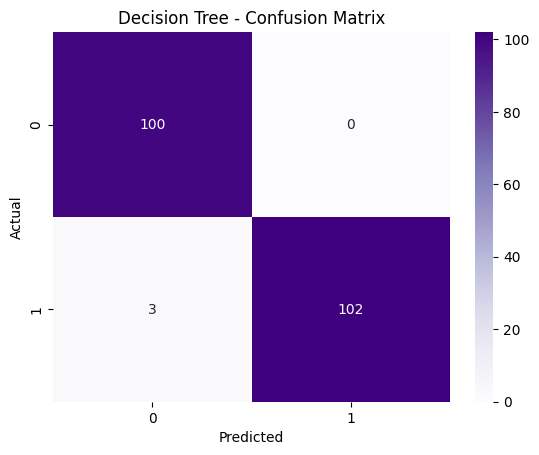

In [ ]:


# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluation
print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Purples')
plt.title("Decision Tree - Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



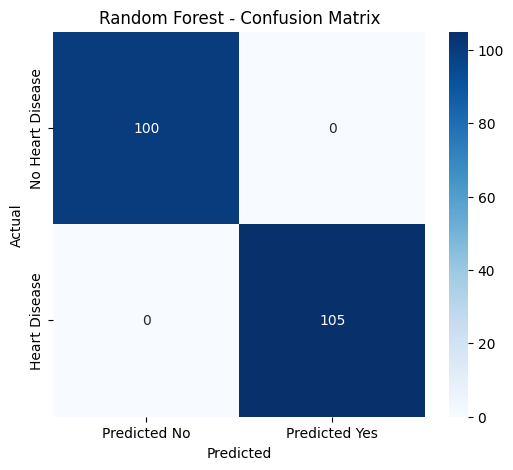

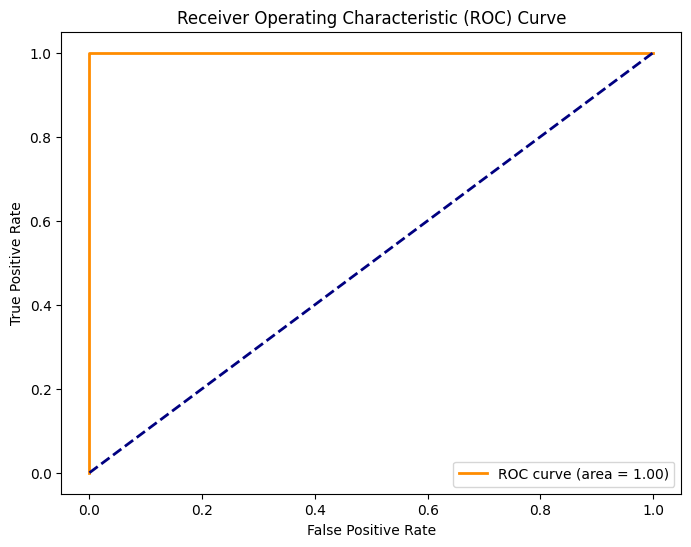

Random Forest Accuracy: 1.00


In [ ]:


# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_df_rf = pd.DataFrame(conf_matrix_rf, index=['No Heart Disease', 'Heart Disease'], columns=['Predicted No', 'Predicted Yes'])

# Classification Report
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_df_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
y_prob_rf = rf_classifier.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Collect Random Forest Accuracy for Comparison
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:33:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




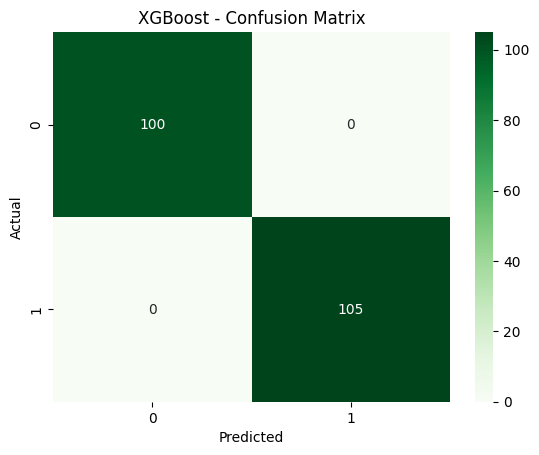

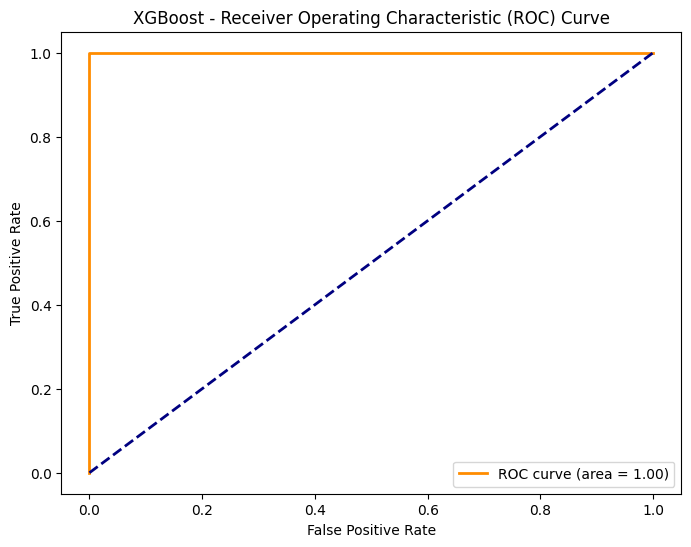

In [ ]:


# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("XGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5899 - loss: 0.6797 - val_accuracy: 0.7610 - val_loss: 0.5369
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6907 - loss: 0.5550 - val_accuracy: 0.8244 - val_loss: 0.4481
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8056 - loss: 0.4588 - val_accuracy: 0.8390 - val_loss: 0.3986
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7989 - loss: 0.4478 - val_accuracy: 0.8390 - val_loss: 0.3716
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8293 - loss: 0.3820 - val_accuracy: 0.8537 - val_loss: 0.3535
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8576 - loss: 0.3500 - val_accuracy: 0.8585 - val_loss: 0.3389
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8494 - loss: 0.3416 - val_accuracy: 0.8537 - val_loss: 0.3290
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8370 - loss: 0.3754 - val_accuracy: 0.8537 - val_loss: 0.3271
Ep

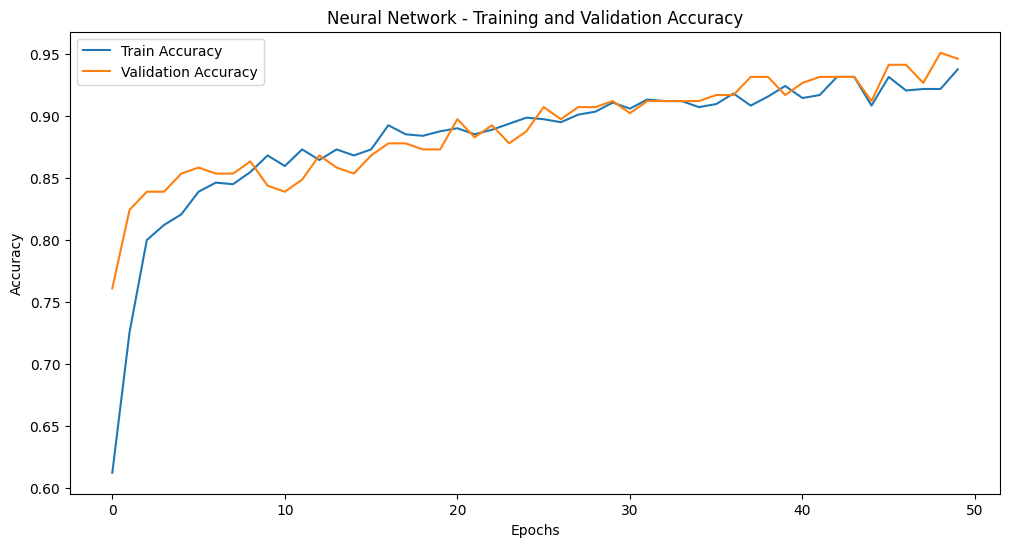

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


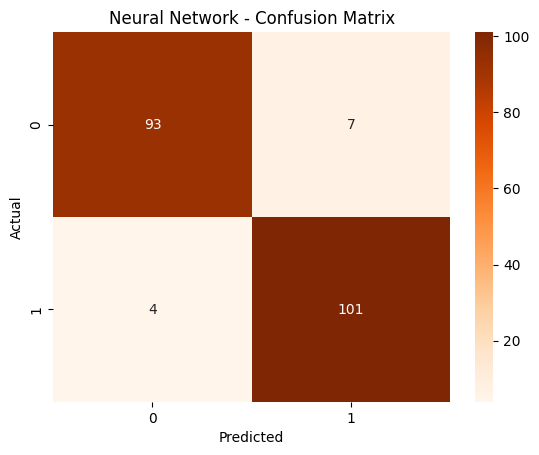

In [ ]:


# Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile Model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = nn_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluate the Model
nn_eval = nn_model.evaluate(X_test_scaled, y_test)
print(f"Neural Network - Test Accuracy: {nn_eval[1]:.2f}")

# Plot Training History
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Neural Network - Confusion Matrix
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Oranges')
plt.title("Neural Network - Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:


# Calculate additional metrics for each model
metrics = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_log_reg),
        "Precision": precision_score(y_test, y_pred_log_reg),
        "Recall": recall_score(y_test, y_pred_log_reg),
        "F1-Score": f1_score(y_test, y_pred_log_reg),
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, y_pred_dt),
        "Precision": precision_score(y_test, y_pred_dt),
        "Recall": recall_score(y_test, y_pred_dt),
        "F1-Score": f1_score(y_test, y_pred_dt),
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf),
        "Recall": recall_score(y_test, y_pred_rf),
        "F1-Score": f1_score(y_test, y_pred_rf),
    },
    "SVM": {
        "Accuracy": accuracy_score(y_test, y_pred_svm),
        "Precision": precision_score(y_test, y_pred_svm),
        "Recall": recall_score(y_test, y_pred_svm),
        "F1-Score": f1_score(y_test, y_pred_svm),
    },
    "k-NN": {
        "Accuracy": accuracy_score(y_test, y_pred_knn),
        "Precision": precision_score(y_test, y_pred_knn),
        "Recall": recall_score(y_test, y_pred_knn),
        "F1-Score": f1_score(y_test, y_pred_knn),
    },
    "Neural Network": {
        "Accuracy": accuracy_score(y_test, y_pred_nn),
        "Precision": precision_score(y_test, y_pred_nn),
        "Recall": recall_score(y_test, y_pred_nn),
        "F1-Score": f1_score(y_test, y_pred_nn),
    },
    "XGBoost": {
        "Accuracy": accuracy_score(y_test, y_pred_xgb),
        "Precision": precision_score(y_test, y_pred_xgb),
        "Recall": recall_score(y_test, y_pred_xgb),
        "F1-Score": f1_score(y_test, y_pred_xgb),
    },
}

# Convert dictionary into a DataFrame
results_df = pd.DataFrame(metrics).transpose()

# Display the DataFrame
print("Model Performance Comparison:")
print(results_df)


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.809756   0.761905  0.914286  0.831169
Decision Tree        0.985366   1.000000  0.971429  0.985507
Random Forest        1.000000   1.000000  1.000000  1.000000
SVM                  0.814634   0.763780  0.923810  0.836207
k-NN                 0.863415   0.873786  0.857143  0.865385
Neural Network       0.946341   0.935185  0.961905  0.948357
XGBoost              1.000000   1.000000  1.000000  1.000000


In [ ]:
# Display Model Accuracies in a Table
print("Model Accuracy Comparison:")
print(results_df)


Model Accuracy Comparison:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.809756   0.761905  0.914286  0.831169
Decision Tree        0.985366   1.000000  0.971429  0.985507
Random Forest        1.000000   1.000000  1.000000  1.000000
SVM                  0.814634   0.763780  0.923810  0.836207
k-NN                 0.863415   0.873786  0.857143  0.865385
Neural Network       0.946341   0.935185  0.961905  0.948357
XGBoost              1.000000   1.000000  1.000000  1.000000


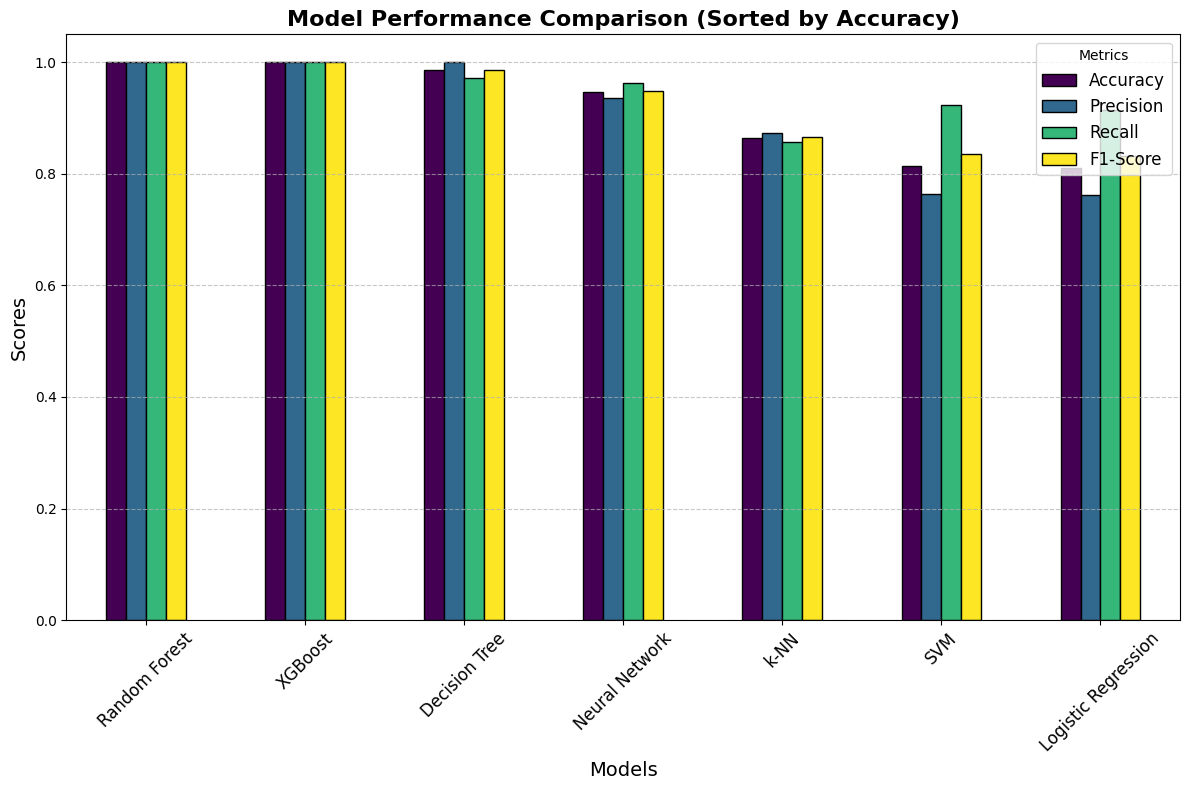

In [ ]:
# Sort the DataFrame by Accuracy in descending order
results_df_sorted = results_df.sort_values(by="Accuracy", ascending=False)

# Plot the sorted metrics
results_df_sorted.plot(kind="bar", figsize=(12, 8), colormap="viridis", edgecolor="black")
plt.title("Model Performance Comparison (Sorted by Accuracy)", fontsize=16, fontweight='bold')
plt.ylabel("Scores", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Metrics", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


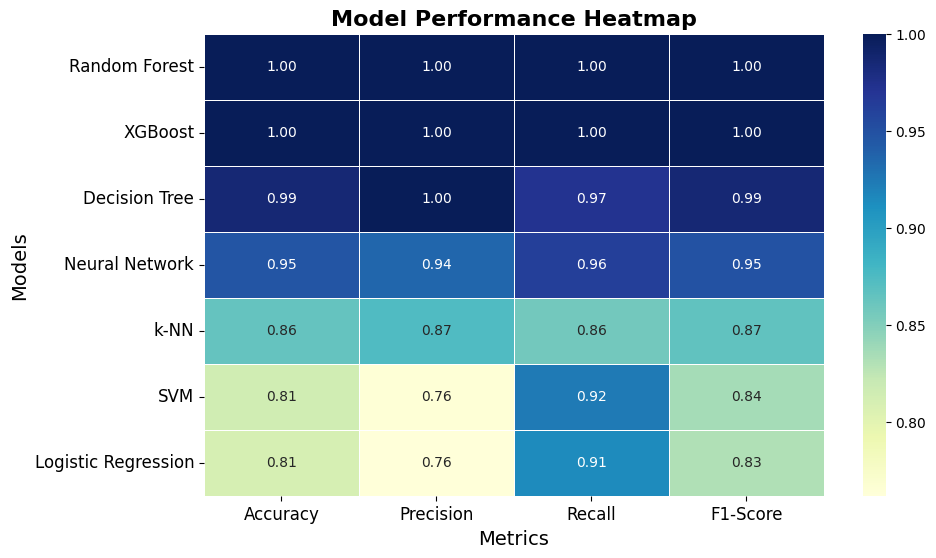

In [ ]:

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results_df_sorted, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Model Performance Heatmap", fontsize=16, fontweight='bold')
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Models", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

